This notebook tests how different the "balanced thompson sampling" behaves.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy
from adaptive_nof1.models import Model
from adaptive_nof1.basic_types import Outcome

BLUE_PILL = 0
ORANGE_PILL = 1


class SimpleModel(Model):
    def __init__(self, patient_id):
        self.rng = numpy.random.default_rng(patient_id)
        self.patient_id = patient_id

    def generate_context(self, history):
        return {}

    def observe_outcome(self, action, context):
        if action["treatment"] == BLUE_PILL:
            return {"outcome": self.rng.normal(0, 1)}
        else:
            return {"outcome": self.rng.normal(1, 1)}

    def __str__(self):
        return f"SimpleModel"

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# Simulation constants
data_generating_model = lambda patient_id: SimpleModel(patient_id)

length = 100
number_of_actions = 2
number_of_patients = 20

In [4]:
from adaptive_nof1 import SeriesOfSimulationsRunner
from adaptive_nof1.policies import (
    FixedPolicy,
    ThompsonSampling,
    BalancedThompsonSampling,
)
from adaptive_nof1.inference import GaussianAverageTreatmentEffect

fixed_runner = SeriesOfSimulationsRunner(
    model_from_patient_id=data_generating_model,
    n_patients=number_of_patients,
    policy=FixedPolicy(number_of_actions=number_of_actions),
)
fixed_data = fixed_runner.simulate(length)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
ts_runner = SeriesOfSimulationsRunner(
    model_from_patient_id=data_generating_model,
    n_patients=number_of_patients,
    policy=ThompsonSampling(
        inference_model=GaussianAverageTreatmentEffect(),
        number_of_actions=number_of_actions,
        posterior_update_interval=2,
    ),
)
ts_data = ts_runner.simulate(length)

  0%|          | 0/100 [00:00<?, ?it/s]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 6 seconds.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 6 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 6 seconds.

In [ ]:
balanced_ts_runner = SeriesOfSimulationsRunner(
    model_from_patient_id=data_generating_model,
    n_patients=number_of_patients,
    policy=BalancedThompsonSampling(
        inference_model=GaussianAverageTreatmentEffect(),
        number_of_actions=number_of_actions,
        posterior_update_interval=2,
    ),
)
balanced_ts_data = balanced_ts_runner.simulate(length)

(-20.0, 5.0)

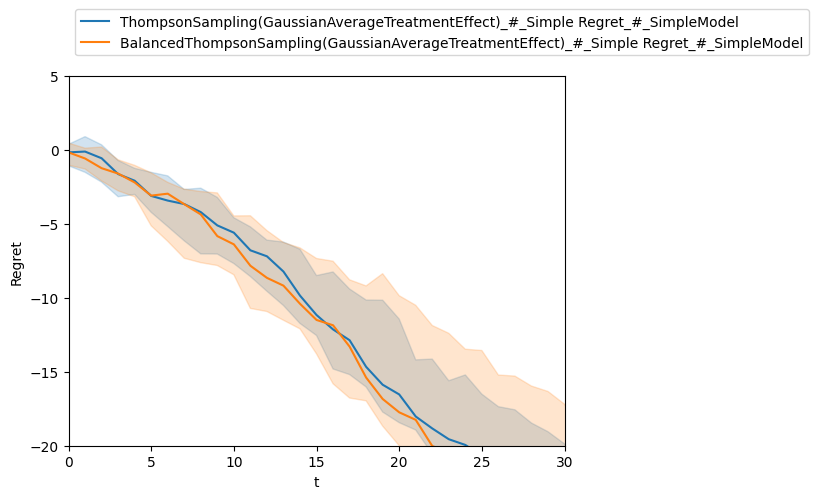

In [34]:
from adaptive_nof1.metrics import SimpleRegret
from adaptive_nof1.series_of_simulations_data import SeriesOfSimulationsData
import matplotlib.pyplot as plt

SeriesOfSimulationsData.plot_lines(
    [ts_data, balanced_ts_data],
    [SimpleRegret(outcome_name="outcome")],
)
plt.xlim(0, 30)
plt.ylim(-20, 5)

In [12]:
fixed_data.plot_allocations()

:HeatMap   [t,patient_id]   (treatment,debug_info,context,outcome,counterfactual_outcomes,treatment)

In [13]:
ts_data.plot_allocations()

:HeatMap   [t,patient_id]   (treatment,debug_info,context,outcome,counterfactual_outcomes,treatment)

In [14]:
balanced_ts_data.plot_allocations()

:HeatMap   [t,patient_id]   (treatment,debug_info,context,outcome,counterfactual_outcomes,treatment)

In [44]:
d

,t,score,simulation,patient_id,model,policy,metric
0,0,-0.125730,SimulationData,0,SimpleModel,ThompsonSampling(GaussianAverageTreatmentEffect),Simple Regret
1,1,-1.230630,SimulationData,0,SimpleModel,ThompsonSampling(GaussianAverageTreatmentEffect),Simple Regret
2,2,-3.534630,SimulationData,0,SimpleModel,ThompsonSampling(GaussianAverageTreatmentEffect),Simple Regret
3,3,-3.269209,SimulationData,0,SimpleModel,ThompsonSampling(GaussianAverageTreatmentEffect),Simple Regret
4,4,-1.944178,SimulationData,0,SimpleModel,ThompsonSampling(GaussianAverageTreatmentEffect),Simple Regret
...,...,...,...,...,...,...,...
95,95,-77.965190,SimulationData,19,SimpleModel,BalancedThompsonSampling(GaussianAverageTreatm...,Simple Regret
96,96,-80.190058,SimulationData,19,SimpleModel,BalancedThompsonSampling(GaussianAverageTreatm...,Simple Regret
97,97,-81.958495,SimulationData,19,SimpleModel,BalancedThompsonSampling(GaussianAverageTreatm...,Simple Regret
98,98,-82.228547,SimulationData,19,SimpleModel,BalancedThompsonSampling(GaussianAverageTreatm...,Simple Regret


2
                                                    count      mean       std  \
policy                                                                          
BalancedThompsonSampling(GaussianAverageTreatme...   20.0 -1.118875  1.850513   
ThompsonSampling(GaussianAverageTreatmentEffect)     20.0 -0.968875  1.877391   

                                                         min       25%  \
policy                                                                   
BalancedThompsonSampling(GaussianAverageTreatme... -5.723652 -2.091034   
ThompsonSampling(GaussianAverageTreatmentEffect)   -5.723652 -2.166182   

                                                         50%       75%  \
policy                                                                   
BalancedThompsonSampling(GaussianAverageTreatme... -1.227268  0.202014   
ThompsonSampling(GaussianAverageTreatmentEffect)   -0.555385  0.354588   

                                                         max  
policy          

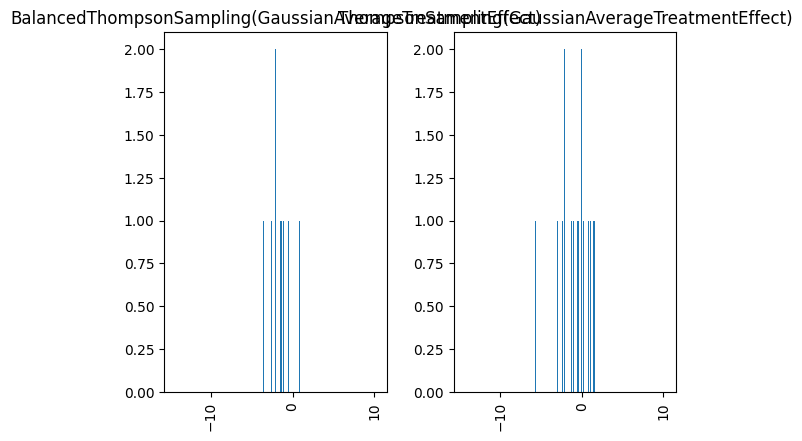

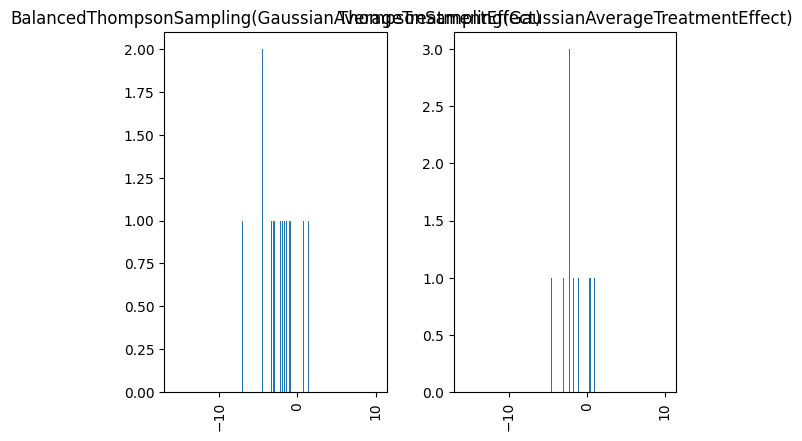

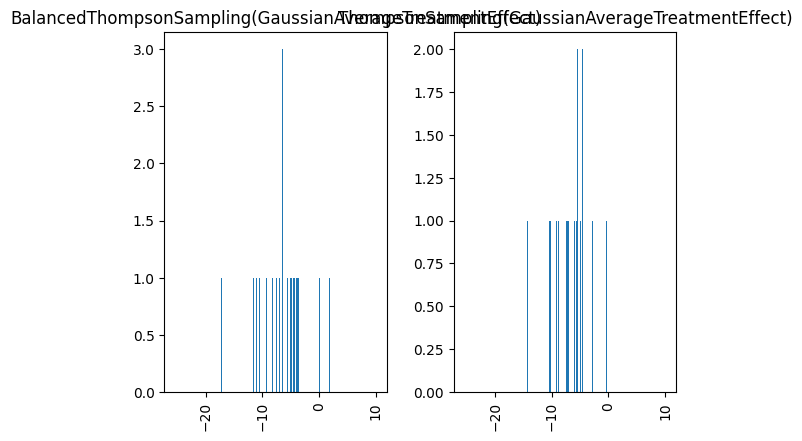

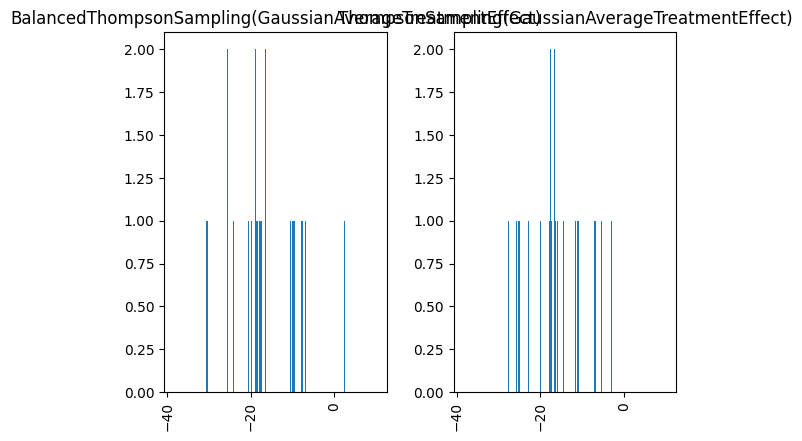

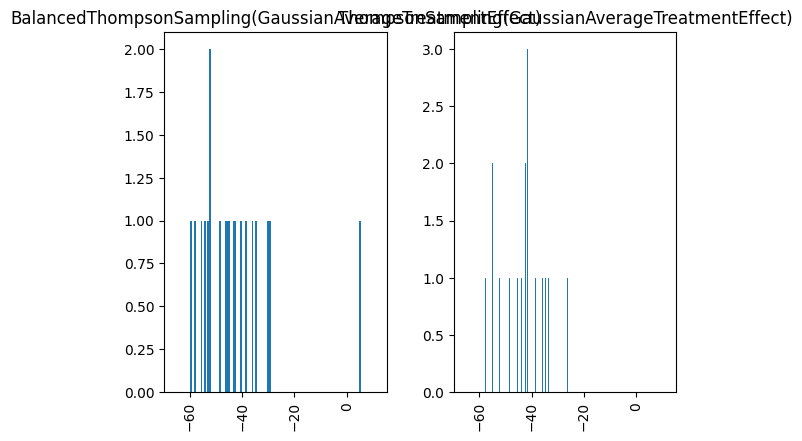

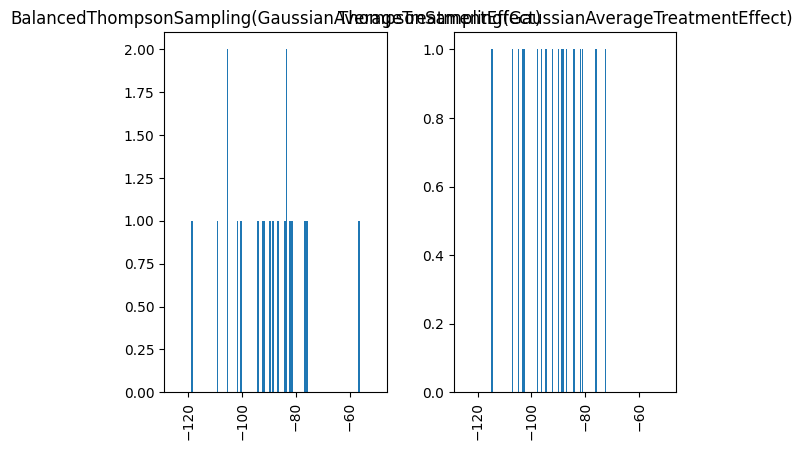

In [77]:
# Histograms of Outcome Distribution
d = SeriesOfSimulationsData.score_data(
    [ts_data, balanced_ts_data],
    [SimpleRegret(outcome_name="outcome")],
)
for t in [2, 4, 10, 20, 50, 99]:
    timepoint = d[d["t"] == t]
    print(t)
    axes = timepoint.hist("score", by="policy", bins=100)
    xmin, xmax = timepoint["score"].min(), timepoint["score"].max()
    print(timepoint.groupby("policy")["score"].describe())
    for ax in axes.flatten():
        ax.set_xlim(xmin - 10, xmax + 10)

In [71]:
# Store data to disk
import jsonpickle

with open("../data/2023-10-11-comparison-between-ts-and-balanced-ts.json", "w") as file:
    file.write(jsonpickle.encode([fixed_data, ts_data, balanced_ts_data]))

In [ ]:
## Load jsonpickle from disk:
# with open('../data/2023-09-20-series.json', "r") as file:
#    [fixed_data, ts_data, balanced_ts_data] = jsonpickle.decode(file.read())